# Importy

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Dane

### Pobranie danych

In [3]:
DATA_FOLDER = os.path.join(os.getcwd(), 'dane')
datasets = {}

### Zamieszkali w domach studenckich

In [4]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Studenci_zamieszkali_w_domach.csv'))
print(data.head())
datasets['Studenci_zamieszkali_w_domach'] = data

    rok  wartosc
0  2019    85878
1  2020    48469
2  2021    71194
3  2022    76960


### Miejsca w domach studenckich

In [6]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Miejsca_w_domach_studenckich.csv'), sep=';')
IMPORTANT_COLUMNS = ['opis_okres', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data['wartosc'] = data['wartosc'].apply(lambda x: int(float(x.replace(',', '.')) * 1_000)) # Oryginalne dane podane są w tysiącach
data.rename(columns={'opis_okres': 'rok'}, inplace=True)
datasets['Miejsca_w_domach_studenckich'] = data
data.head()

,rok,wartosc
0,2019,123100
1,2020,117500
2,2021,112400
3,2022,115300


### Liczba studentów uczelni

In [7]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Liczba_studentów_uczelni.csv'), sep=';')
IMPORTANT_COLUMNS = ['opis_okres', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data['wartosc'] = data['wartosc'].apply(lambda x: int(float(x.replace(',', '.')) * 1_000)) # Oryginalne dane podane są w tysiącach
data.rename(columns={'opis_okres': 'rok'}, inplace=True)
datasets['Liczba_studentów_uczelni'] = data
data.head()

,rok,wartosc
0,2019,1204000
1,2020,1218000
2,2021,1218200
3,2022,1223600


## Wizualizacja

### Miejsca w domach studenckich i zamieszkali w nich

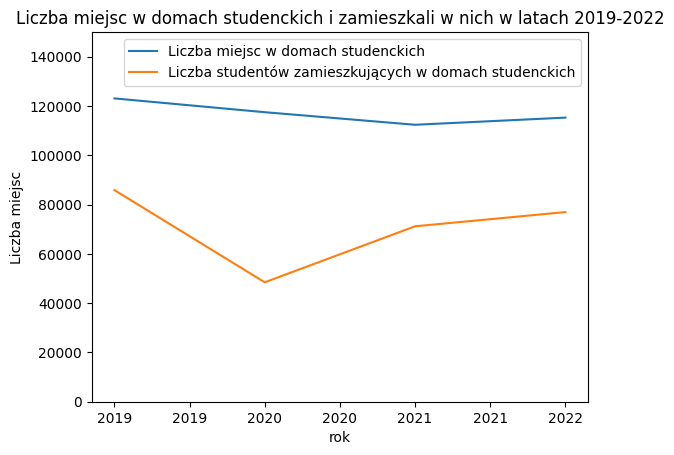

In [9]:
data_total_places = datasets['Miejsca_w_domach_studenckich']
data_residents = datasets['Studenci_zamieszkali_w_domach']

plt.plot(data_total_places['rok'], data_total_places['wartosc'], label='Liczba miejsc w domach studenckich')
plt.plot(data_residents['rok'], data_residents['wartosc'], label='Liczba studentów zamieszkujących w domach studenckich')
plt.xlabel('rok')
plt.ylabel('Liczba miejsc')
plt.ylim(0, 150_000)
plt.title(f'Liczba miejsc w domach studenckich i zamieszkali w nich w latach 2019-2022')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.show()

### Stosunek liczby miejsc do liczby zamieszkałych i ogółem (wolne miejsca na studenta zamieszkałego i ogółem)

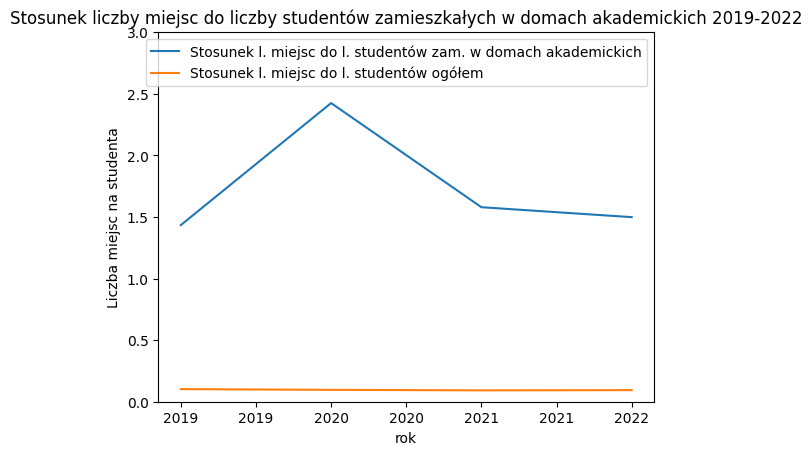

In [11]:
data_vacant_dorm_rooms = datasets['Miejsca_w_domach_studenckich']
data_students_in_dorms = datasets['Studenci_zamieszkali_w_domach']
data_students = datasets['Liczba_studentów_uczelni']

plt.plot(data_vacant_dorm_rooms['rok'], data_vacant_dorm_rooms['wartosc'] / data_students_in_dorms['wartosc'], label='Stosunek l. miejsc do l. studentów zam. w domach akademickich')
plt.plot(data_vacant_dorm_rooms['rok'], data_vacant_dorm_rooms['wartosc'] / data_students['wartosc'], label='Stosunek l. miejsc do l. studentów ogółem')
plt.xlabel('rok')
plt.ylabel('Liczba miejsc na studenta')
plt.ylim(0, 3)
plt.title(f'Stosunek liczby miejsc do liczby studentów (zamieszkałych w domach akademickich i ogólnie) 2019-2022')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.show()